Initial sampling frequency:	20000 Hz
Samples 	 40001 	 Raw Norm


FileNotFoundError: [Errno 2] No such file or directory: '../out/Raw_Norm.pkl'

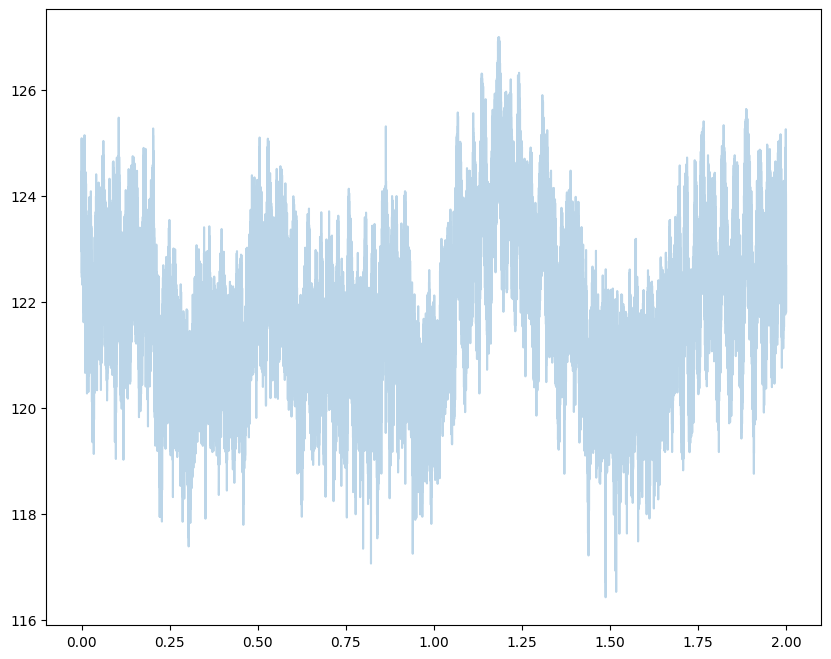

In [8]:
import io, os, sys
import numpy as np
import matplotlib.pyplot as plt


from src.processes import *

BITS_N = 8
BITS_LC = 8

# plt.ion()
# plt.show()

processes = []


EPIPHONE    = './in/Epiphone'
BIOPAC      = './in/Biopac'
JACKSON     = './in/Jackson'


def add_step(series, alpha=1):
    print(f'Samples \t {len(series.time)} \t {series}')
    ax.plot(series.time, series.data, alpha = alpha )
    processes.append(series)
    series.dump(path="./out/")

filename, time_s = EPIPHONE, 60
filename, time_s = BIOPAC, 60
filename, time_s = JACKSON, 2


EXTENSION = '.txt'
figure, ax = plt.subplots(figsize=(10, 8))


y = []

with open(filename+EXTENSION) as f:
    y = f.readlines()

data = np.asarray([int(np.round(float(f))) for f in y])

s_n = len(data)
T_s = time_s/s_n
f_Hz = s_n/time_s
time = np.arange(0,time_s,T_s)

'''```````````````````````````````````````
        TAKE ONLY A WINDOW

```````````````````````````````````````'''

if 0:
    FROM_S  = 57
    TO_S    = 60

    start   = int(FROM_S*f_Hz)
    end     = int(TO_S*f_Hz)
    time_s  = TO_S-FROM_S
    data    = data[start:end]
    time    = time[start:end]

'''```````````````````````````````````````
        DOWNSAMPLE

```````````````````````````````````````'''

print(f"Initial sampling frequency:\t{f_Hz:.0f} Hz")

if 0:
    f_Hz_new    = 200
    skip        = int( f_Hz/ f_Hz_new )
    f_Hz_new    = f_Hz/skip
    data        = data[::skip]
    time        = time[::skip]

    print(f"New samping frequency:\t{f_Hz_new:.0f} Hz (/{skip})")
    f_Hz = f_Hz_new


'''```````````````````````````````````````
        RAW SIGNAL

```````````````````````````````````````'''

''' The raw signal '''
raw = Timeseries('Raw')
raw.data    = data
raw.time    = time
raw.f_Hz    = f_Hz
# add_step(raw, 0.3) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

''' Normalize the data '''
raw = norm(raw, BITS_N)
add_step(raw, 0.3) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

NameError: name 'filename' is not defined

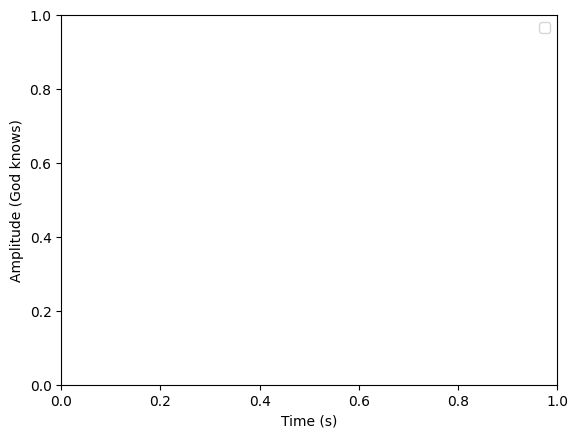

In [ ]:



if 0:
    if filename == BIOPAC:
        ax.set_xlim(50, 60)
    if filename == EPIPHONE:
        ax.set_xlim(57, 59)
    if filename == JACKSON:
        ax.set_xlim(0.75,0.775)
        # ax.set_xlim(0, 0.001)

plt.legend(processes)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (God knows)")
plt.title(f"Signal from {filename}")
[ plt.axhline(l, color='k', linestyle=':', alpha=0.2 ) for l in lvls ]

plt.show()